In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('songs_normalize.csv')

# Select features and target
X = df[['energy', 'danceability', 'valence']]
y = (df['popularity'] > df['popularity'].median()).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [3]:
# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_fn=nn.ReLU):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        self.activation = activation_fn()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = MLPModel(input_size=3, hidden_sizes=[64, 32], output_size=2, activation_fn=nn.ReLU)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_tensor, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_tensor, y_pred))
print("\nAccuracy:", accuracy_score(y_test_tensor, y_pred))

Confusion Matrix:
[[ 83 117]
 [ 81 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.41      0.46       200
           1       0.50      0.59      0.55       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.50       400


Accuracy: 0.505


In [23]:
# Initialize list to store loss values
loss_values = []

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Store loss value
    loss_values.append(loss.item())
    
    # Print every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.3444
Epoch [100/500], Loss: 0.3429
Epoch [150/500], Loss: 0.3423
Epoch [200/500], Loss: 0.3410
Epoch [250/500], Loss: 0.3390
Epoch [300/500], Loss: 0.3379
Epoch [350/500], Loss: 0.3372
Epoch [400/500], Loss: 0.3356
Epoch [450/500], Loss: 0.3351
Epoch [500/500], Loss: 0.3337


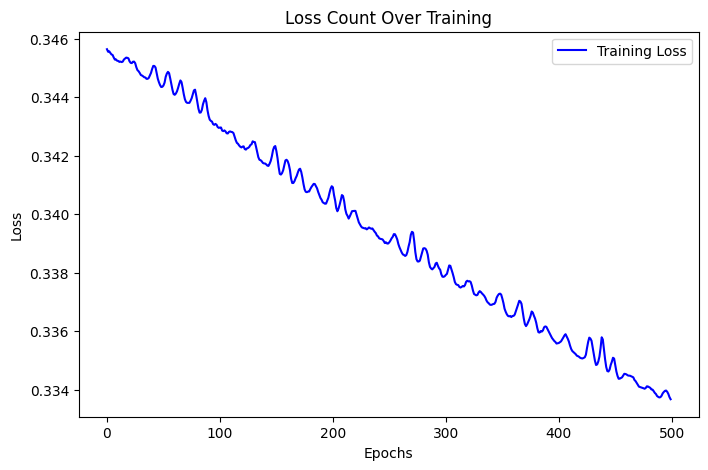

In [24]:
# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_values, label="Training Loss", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Count Over Training")
plt.legend()
plt.show()

In [ ]:
# Interpretation
# This code implements an MLP with PyTorch using the Spotify dataset.
# The evaluation provides a confusion matrix, classification report, and accuracy. The training loop updates weights using the Adam optimizer.

In [ ]:
#Arjun Ajithan Nadukandiyil
#2241119
#6BCA B